In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import RFE, RFECV
from sklearn import preprocessing

from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from factor_analyzer import FactorAnalyzer

# import statsmodels.discrete.discrete_model as sm

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import (
    f1_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
)
from sklearn.model_selection import (
    RepeatedStratifiedKFold,
    GridSearchCV,
    cross_val_score,
)
from sklearn import metrics

from yellowbrick.classifier import confusion_matrix

<IPython.core.display.Javascript object>

In [3]:
# Read in data
data = pd.read_csv("../14_profiles/reduced_dim_14.csv")
data

,profile_standardized,.NET,.NET Core,API,API Design,APIs,ASP.NET,ASP.NET MVC,AWS,AWS DynamoDB,...,Xamarin,Xamarin Forms,Xcode,Zend Framework,iOS,iOS Operating System,iOS SDK,iPad,jQuery,js
0,fullstack developer,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,javascript developer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,machine learning engineer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,machine learning engineer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,android developer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,fullstack developer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
767,machine learning engineer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
768,ios developer,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
769,javascript developer,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [4]:
# Assign data to X & y
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

<IPython.core.display.Javascript object>

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=0)

<IPython.core.display.Javascript object>

In [6]:
# Instantiate and Fit the RandomForestClassifier object
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

<IPython.core.display.Javascript object>

In [7]:
# Make predictions using the testing data
y_pred = model.predict(X_test)
print(
    "Accuracy of logistic regression classifier on test set: {:.2f}".format(
        model.score(X_test, y_test)
    )
)

Accuracy of logistic regression classifier on test set: 0.57


<IPython.core.display.Javascript object>

graph to figure out the optimal number of features
RFE requires a specified number of features to keep, however it is often not known in advance how many features are valid. To find the optimal number of features cross-validation is used with RFE to score different feature subsets and select the best scoring collection of features

C:\Users\oefel\.virtualenvs\Celerative_Working-MkC17mr_\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\oefel\.virtualenvs\Celerative_Working-MkC17mr_\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KeyboardInterrupt: 

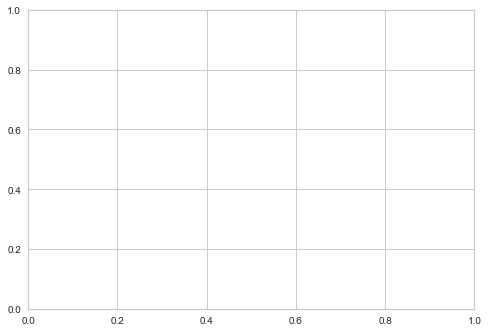

<IPython.core.display.Javascript object>

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import RFECV

cv = StratifiedKFold(3)
visualizer = RFECV(model, cv=cv, scoring="accuracy")

visualizer.fit(X, y)  # Fit the data to the visualizer
visualizer.show()

In [ ]:
rfe = RFE(model).fit(X, y)
# Rank of 1 indicates features selected
print(rfe.ranking_)

In [ ]:
# returns bool arr of True for features_selected
selection = rfe.get_support(1)  # the most important features
print(len(selection))

In [ ]:
X = X[X.columns[selection]]  # final features`

In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=0)

In [ ]:
# Instantiate and Fit the RandomForestClassifier object
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

In [ ]:
# Make predictions using the testing data
y_pred = model.predict(X_test)
print(
    "Accuracy of logistic regression classifier on test set: {:.2f}".format(
        model.score(X_test, y_test)
    )
)

In [ ]:
# Instantiate the visualizer with the classification model
confusion_matrix(
    model,
    X_train,
    y_train,
    X_test,
    y_test,
    classes=[
        "android developer",
        "c# developer",
        "data architecture developer",
        "frontend developer",
        "fullstack developer",
        "ios developer",
        "java developer",
        "javascript developer",
        "machine learning engineer",
        "php developer",
        "python developer",
        "quality assurance",
        "ruby on rails developer",
        "web design",
    ],
)
plt.tight_layout()